# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 
import csv
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = ["metric", "imperial"]
query_url = f"{url}appid={weather_api_key}&units={units}&q="


weather_response = requests.get(query_url + city)
weather_json = weather_response.json()


In [19]:
city_df = []
country_df = []
date_df = []
lat_vol = []
lon_vol = []
temperature = []
humidity = []
cloudiness = []
wind_speed_df = []

In [20]:

processing_data = 1

# Loop Through List of Cities & Perform a Request for Data on Each city
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        
        city_df.append(response["name"])
        
        country_df.append(response["sys"]["country"])
        date_df.append(response["dt"])
        lat_vol.append(response["coord"]["lat"])
        lon_vol.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed_df.append(response["wind"]["speed"])
        
        city_data = response["name"]
        
        print(f"searching for Record {processing_data} {city_data}")
        
         # Increase data Counter by 1 For Each Loop
        processing_data += 1
        
    except(KeyError):
        print("message: city not found") 
    continue


searching for Record 1 Deputatsky
searching for Record 2 Vaini
searching for Record 3 Hasaki
searching for Record 4 Conde
searching for Record 5 Maceió
searching for Record 6 Cap Malheureux
searching for Record 7 Nabire
searching for Record 8 Aksarka
searching for Record 9 Cayenne
searching for Record 10 Albany
searching for Record 11 Provideniya
searching for Record 12 Upernavik
searching for Record 13 Ancud
searching for Record 14 Palmer
searching for Record 15 Busselton
searching for Record 16 Punta Arenas
message: city not found
searching for Record 17 Carnarvon
searching for Record 18 Bredasdorp
searching for Record 19 Cherskiy
searching for Record 20 Guerrero Negro
searching for Record 21 Tuktoyaktuk
searching for Record 22 Saint Paul Harbor
searching for Record 23 Homer
searching for Record 24 Pacific Grove
searching for Record 25 Yamada
searching for Record 26 Petropavlovsk-Kamchatskiy
searching for Record 27 Äänekoski
searching for Record 28 Viedma
searching for Record 29 Láza

searching for Record 230 The Valley
searching for Record 231 Mungwi
searching for Record 232 Diu
searching for Record 233 Bilibino
message: city not found
searching for Record 234 Doha
searching for Record 235 Zhezkazgan
searching for Record 236 Aksu
searching for Record 237 Petrolina
searching for Record 238 Sisimiut
searching for Record 239 Mastic Beach
searching for Record 240 Amoy
message: city not found
searching for Record 241 Wanaka
searching for Record 242 Ponta Delgada
searching for Record 243 Port Hedland
searching for Record 244 Kachug
searching for Record 245 Bairiki Village
searching for Record 246 Srednekolymsk
searching for Record 247 Callosa de Segura
searching for Record 248 Buchanan
searching for Record 249 Abu Dhabi
searching for Record 250 Dawei
searching for Record 251 Nanortalik
searching for Record 252 Aizpute
message: city not found
searching for Record 253 Keuruu
searching for Record 254 Ostrovnoy
searching for Record 255 Río Gallegos
searching for Record 256 B

searching for Record 453 Acapulco de Juárez
searching for Record 454 Lashio
searching for Record 455 Pozoblanco
searching for Record 456 Saint Anthony
message: city not found
searching for Record 457 Leh
searching for Record 458 Ilhéus
searching for Record 459 Camrose
searching for Record 460 Río Tercero
searching for Record 461 Shingū
searching for Record 462 Cockburn Town
searching for Record 463 Hervey Bay
searching for Record 464 Valdivia
searching for Record 465 Boulder City
searching for Record 466 Āsosa
searching for Record 467 Sur
searching for Record 468 Jiangyou
searching for Record 469 Lagos
message: city not found
searching for Record 470 Jiblah
searching for Record 471 Kuytun
searching for Record 472 Yumen
searching for Record 473 Meadow Lake
searching for Record 474 Erzin
searching for Record 475 Beni
searching for Record 476 Paamiut
searching for Record 477 Madrid
searching for Record 478 Dudinka
searching for Record 479 Norrtälje
searching for Record 480 Abu Kamal
searc

In [28]:
# weather_json

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_dict = {
    "City": city_df,
    "Country": country_df,
    "Date": date_df,
    "Latitude": lat_vol,
    "Longitude": lon_vol,
    "Max Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed_df
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City               558
Country            558
Date               558
Latitude           558
Longitude          558
Max Temperature    558
Humidity           558
Cloudiness         558
Wind Speed         558
dtype: int64

In [22]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Deputatsky,RU,1597642123,69.30,139.90,277.98,81,100,2.8
1,Vaini,TO,1597642123,-21.20,-175.20,295.15,68,75,4.6
2,Hasaki,JP,1597642123,35.73,140.83,308.71,63,75,5.7
3,Conde,BR,1597642124,-7.26,-34.91,295.15,100,40,2.1
4,Maceió,BR,1597642124,-9.67,-35.74,294.15,100,40,0.5


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
#  Get the indices of cities that have humidity over 100%.

In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

weather_df_val = weather_df.dropna()

weather_df_val = weather_df_val.reset_index(drop=True)

weather_df_val["City"] = weather_df_val["City"]



In [24]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

#weather_df.to_csv("./ouput_data/weather_df.csv")
weather_df.to_csv = ("./output_data/weather_df.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

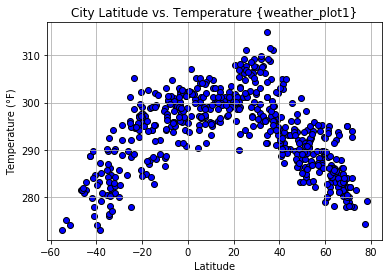

In [25]:


weather_plot1 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Max Temperature"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Temperature {weather_plot1}")
plt.ylabel("Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Temp_Latitude.png")
plt.show()


## Latitude vs. Humidity Plot

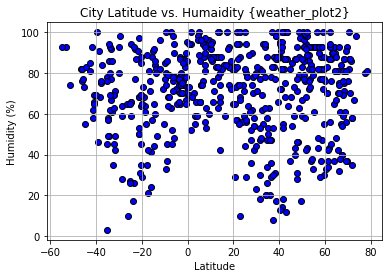

In [26]:
weather_plot2 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Humidity"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Humaidity {weather_plot2}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Humidity_Latitude.png")
plt.show()


## Latitude vs. Cloudiness Plot

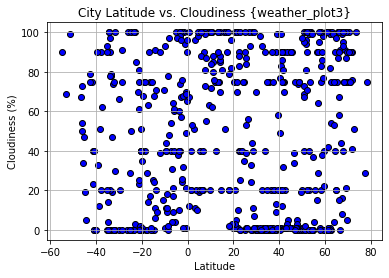

In [27]:
weather_plot3 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Cloudiness"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Cloudiness {weather_plot3}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Cloudiness_Latitude.png")
plt.show()


## Latitude vs. Wind Speed Plot

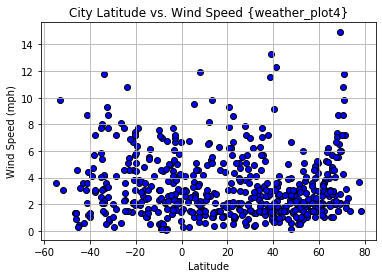

In [28]:
weather_plot4 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Wind Speed"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Wind Speed {weather_plot4}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Wind_Speed_Latitude.png")
plt.show()

## Linear Regression

In [30]:
# OPTIONAL: Create a function to create Linear Regression plots


In [29]:

def plot_lin_reg(x_value,y_value,xlbl,ylbl,lblpos,ifigure):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")
    
    plt.annotate(line_eq,lblpos,fontsize=14,color="blue")
    print(f"The r-squared is: {rvalue}")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    
    plt.savefig(f"fig{ifigure}.png")
    plt.show() 

In [31]:
# Create Northern and Southern Hemisphere DataFrames

hem_northern_df = weather_df_val.Latitude >= 0
hem_southtern_df = weather_df_val.Latitude < 0

weather_northern = weather_df_val[hem_northern_df]
weather_southern = weather_df_val[hem_southtern_df]

weather_northern = weather_northern.reset_index(drop=True)
weather_southern = weather_southern.reset_index(drop=True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6930652914609572


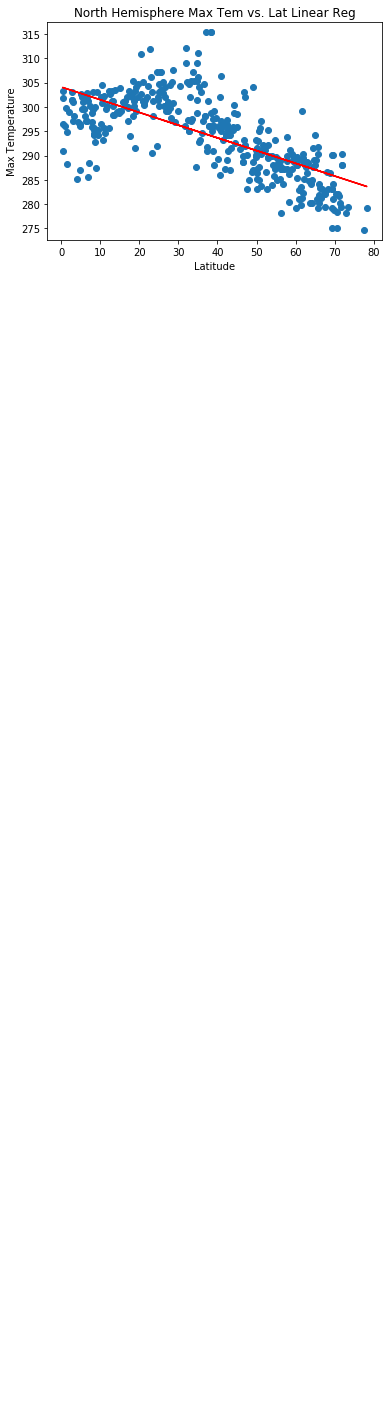

In [201]:

xlbl = "Latitude"
ylbl = "Max Temperature"
lblpos = (0,30)
plt.title("North Hemisphere Max Tem vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,1)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7841912955389293


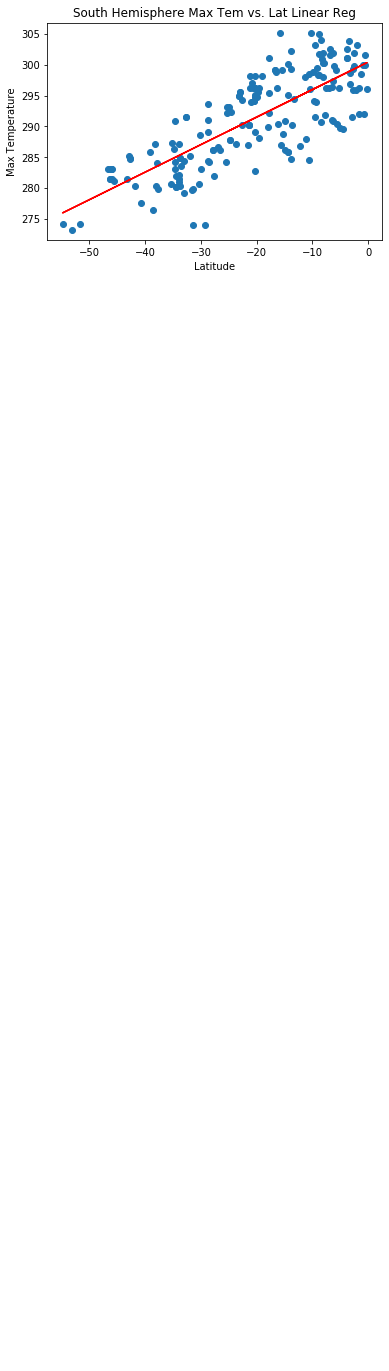

In [229]:
xlbl = "Latitude"
ylbl = "Max Temperature"
lblpos = (-45,90)
plt.title("South Hemisphere Max Tem vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,2)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.08326482667605868


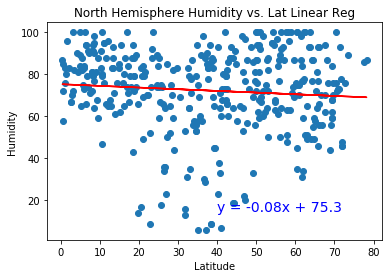

In [210]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (40,15)
plt.title("North Hemisphere Humidity vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,3)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03737514188228299


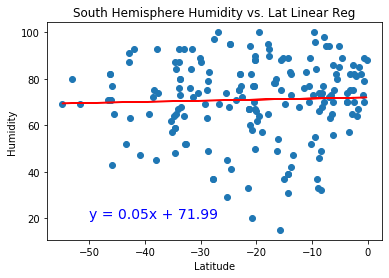

In [230]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-50,20)
plt.title("South Hemisphere Humidity vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,4)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.07543964102848279


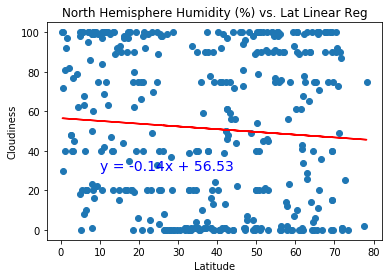

In [219]:
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (10,30)
plt.title("North Hemisphere Humidity (%) vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.028841109142025725


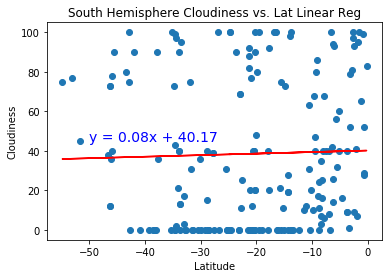

In [231]:
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (-50,45)
plt.title("South Hemisphere Cloudiness vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,6)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1369703072219265


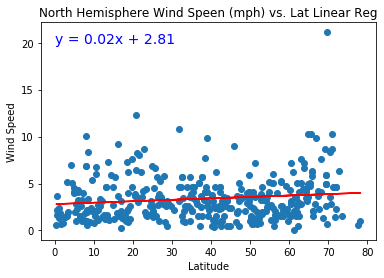

In [241]:
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (0,20)
plt.title("North Hemisphere Wind Speen (mph) vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3219121185896618


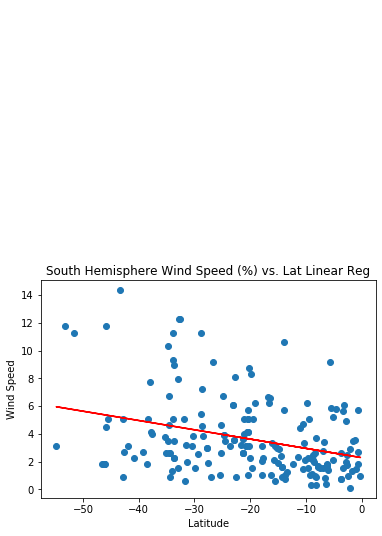

In [245]:
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (-20,34)
plt.title("South Hemisphere Wind Speed (%) vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,8)